# Naive Approach

We will simply try a naive approach to be used as a benchmark for the actual models later on.

In [1]:
import pandas as pd
import random
random.seed(42)

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from utils import load_and_prepare_data, evaluate_metrics, plot_roc_curve

In [3]:
df = pd.read_parquet("../diabetes_dataset_prepared.parquet")
df.head()

,family_history_diabetes,hypertension_history,cardiovascular_history,waist_to_hip_ratio,glucose_fasting,glucose_postprandial,hba1c,diagnosed_diabetes,glucose_fasting_times_hba1c,glucose_postprandial_times_hba1c,...,hdl_cholesterol_Normal,hdl_cholesterol_High,ldl_cholesterol_Near_optimal,ldl_cholesterol_Borderline_high,ldl_cholesterol_High,ldl_cholesterol_Very_high,triglycerides_Borderline_high,triglycerides_High,insulin_level_Normal,insulin_level_High
0,0,0,0,0.89,136,236,8.18,1,1112.479980,1930.480103,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0.80,93,150,5.63,0,523.590027,844.500000,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0.81,118,195,7.51,1,886.180054,1464.450073,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0.88,139,253,9.03,1,1255.169922,2284.589844,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0.78,137,184,7.20,1,986.399963,1324.799927,...,1,0,1,0,0,0,1,0,1,0


In [4]:
X_train, X_test, y_train, y_test = load_and_prepare_data(df)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (80000, 72), X_test shape: (20000, 72), y_train shape: (80000,), y_test shape: (20000,)


In [5]:
random_values_train = [random.random() for _ in range(len(y_train))]
random_values_test = [random.random() for _ in range(len(y_test))]

y_train_pred = [1 if value >= 0.5 else 0 for value in random_values_train]
y_test_pred = [1 if value >= 0.5 else 0 for value in random_values_test]

print(f"y_train_pred length: {len(y_train_pred)}, y_test_pred length: {len(y_test_pred)}")

y_train_pred length: 80000, y_test_pred length: 20000


Training Set Metrics:


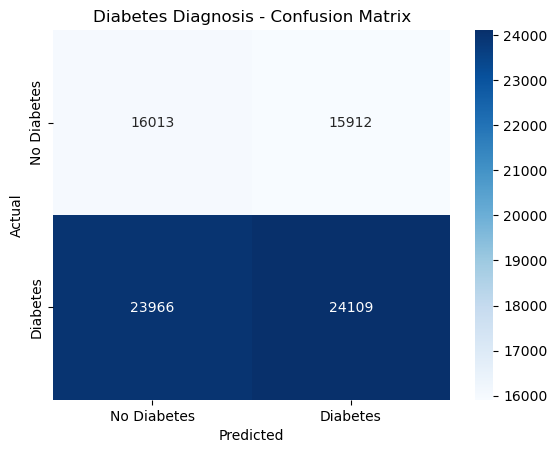

Accuracy: 0.501525
Precision: 0.6024087354139077
Recall: 0.5014872594903796
F1 Score: 0.5473347257537232


Test Set Metrics:


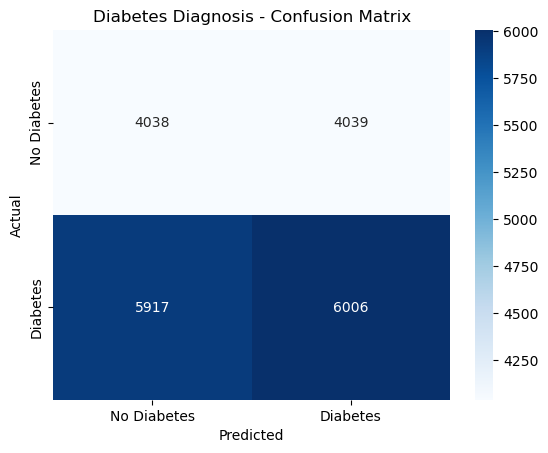

Accuracy: 0.5022
Precision: 0.5979094076655053
Recall: 0.5037322821437558
F1 Score: 0.5467953386744355


In [6]:
evaluate_metrics(y_train, y_train_pred, "Training Set Metrics:")

print("\n" + "="*75 + "\n")

evaluate_metrics(y_test, y_test_pred, "Test Set Metrics:")

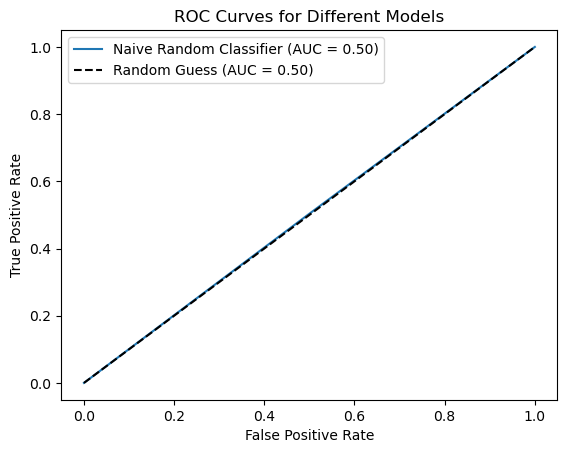

In [7]:
plot_roc_curve(y_test, y_test_pred, "Naive Random Classifier")